In [1]:
from opsimsummary import healpix_boundaries

In [2]:
import numpy as np

In [3]:
import healpy as hp

In [4]:
%matplotlib inline

In [14]:
ipix  = np.array([11])

In [15]:
lon, lat = healpix_boundaries(ipix, nside=4, units='radians')

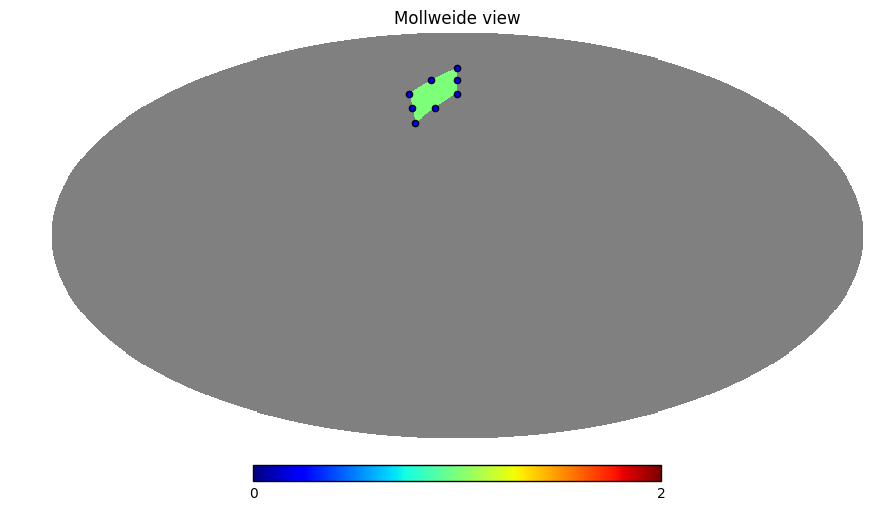

In [16]:
arr = np.ones(hp.nside2npix(4)) * hp.UNSEEN
arr[ipix] = 1
hp.mollview(arr, nest=True)
hp.projscatter(lat, lon)